# Read .edf files and convert to .h5
For import to MATLAB and Python
Script performs the following:
- Read .edf file
- Select only EEG channels/discard EOG, EMG
- Reference to the common average
- Filter DC offset and 60hz notch
- Export to .h5

In [1]:
import os
import numpy as np
import mne
import pathlib
import matplotlib.pyplot as plt

In [2]:
path=pathlib.Path('/home/tris/Documents/EEG_data/physio/eegmmidb/1.0.0')
path

PosixPath('/home/tris/Documents/EEG_data/physio/eegmmidb/1.0.0')

In [5]:
subject = 1
raw=mne.io.read_raw_edf('/home/tris/Documents/EEG_data/physio/eegmmidb/1.0.0/S00'+str(subject)+'/S00'+str(subject)+'R01.edf')
raw.load_data()

Extracting EDF parameters from /home/tris/Documents/EEG_data/physio/eegmmidb/1.0.0/S001/S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...


<RawEDF | S001R01.edf, 64 x 9760 (61.0 s), ~4.9 MB, data loaded>

In [7]:
eeg_channels=raw.ch_names[0:64] #first 64 channels are the EEG ones
eeg_channels

['Fc5.',
 'Fc3.',
 'Fc1.',
 'Fcz.',
 'Fc2.',
 'Fc4.',
 'Fc6.',
 'C5..',
 'C3..',
 'C1..',
 'Cz..',
 'C2..',
 'C4..',
 'C6..',
 'Cp5.',
 'Cp3.',
 'Cp1.',
 'Cpz.',
 'Cp2.',
 'Cp4.',
 'Cp6.',
 'Fp1.',
 'Fpz.',
 'Fp2.',
 'Af7.',
 'Af3.',
 'Afz.',
 'Af4.',
 'Af8.',
 'F7..',
 'F5..',
 'F3..',
 'F1..',
 'Fz..',
 'F2..',
 'F4..',
 'F6..',
 'F8..',
 'Ft7.',
 'Ft8.',
 'T7..',
 'T8..',
 'T9..',
 'T10.',
 'Tp7.',
 'Tp8.',
 'P7..',
 'P5..',
 'P3..',
 'P1..',
 'Pz..',
 'P2..',
 'P4..',
 'P6..',
 'P8..',
 'Po7.',
 'Po3.',
 'Poz.',
 'Po4.',
 'Po8.',
 'O1..',
 'Oz..',
 'O2..',
 'Iz..']

In [8]:
raw.pick_channels(eeg_channels) #select only the EEG channels

<RawEDF | S001R01.edf, 64 x 9760 (61.0 s), ~4.9 MB, data loaded>

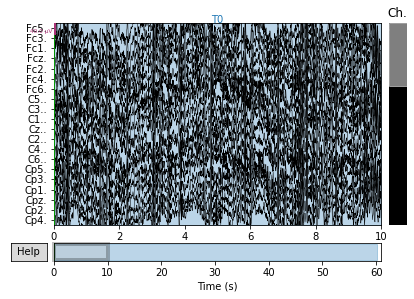

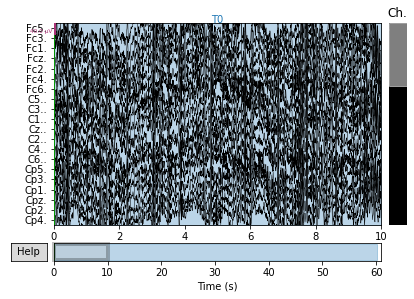

In [9]:
raw.plot()

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.


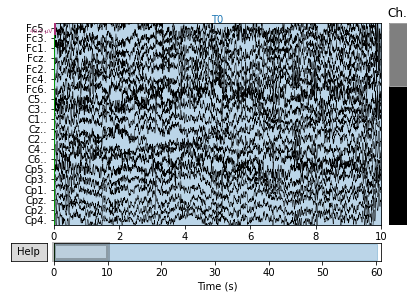

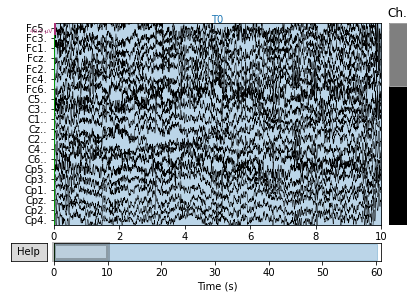

In [12]:
raw_avg=raw.copy().set_eeg_reference(ref_channels='average') #reference to the average (I think is more stable)
raw_avg.plot()

Effective window size : 12.800 (s)


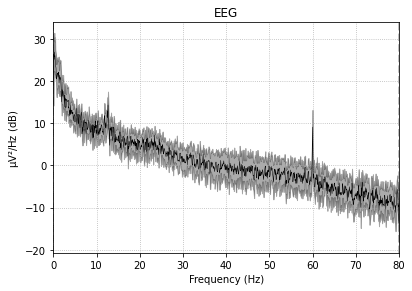

In [14]:
fig = raw_avg.plot_psd(tmax=np.inf, fmax=80, average=True) #check orginal PSD

In [15]:
ssp_projectors = raw.info['projs']
raw.del_proj()

<RawEDF | S001R01.edf, 64 x 9760 (61.0 s), ~4.9 MB, data loaded>

In [20]:
raw_avg.filter(1.5,50, fir_design='firwin')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.50
- Lower transition bandwidth: 1.50 Hz (-6 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 353 samples (2.206 sec)



<RawEDF | S001R01.edf, 64 x 9760 (61.0 s), ~4.9 MB, data loaded>

Effective window size : 12.800 (s)


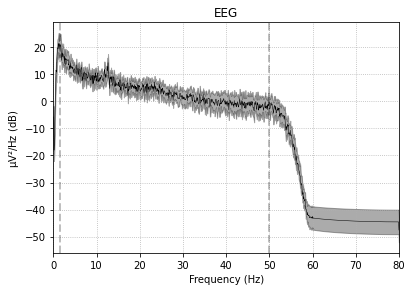

In [21]:
fig = raw_avg.plot_psd(tmax=np.inf, fmax=80, average=True) #check orginal PSD

Effective window size : 12.800 (s)


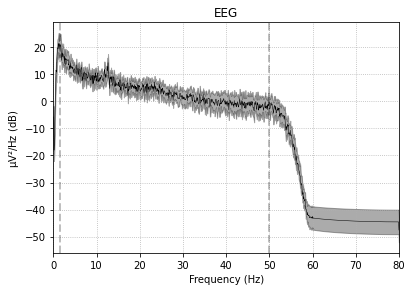

In [22]:
avg_psd=raw_avg.plot_psd(average=True)

In [24]:
df=raw_avg.to_data_frame()

In [31]:
df.to_hdf('/home/tris/Documents/EEG_data/physio/eegmmidb/1.0.0/export/test.h5',key='df')

In [38]:
for n in range (100,110):
    for i in range (1,10):
        raw=mne.io.read_raw_edf('/home/tris/Documents/EEG_data/physio/eegmmidb/1.0.0/S'+str(n)+'/S'+str(n)+'R0'+str(i)+'.edf')
        raw.load_data()
        eeg_channels=raw.ch_names[0:64] #first 64 channels are the EEG ones
        raw.pick_channels(eeg_channels) #select only the EEG channels
        raw_avg=raw.copy().set_eeg_reference(ref_channels='average') #reference to the average (I think is more stable)
        raw_avg.filter(1.5,50, fir_design='firwin')
        df=raw_avg.to_data_frame()
        df.to_hdf('/home/tris/Documents/EEG_data/physio/eegmmidb/1.0.0/export/S'+str(n)+'R0'+str(i)+'.h5',key='df')
    for i in range (10,15):
        raw=mne.io.read_raw_edf('/home/tris/Documents/EEG_data/physio/eegmmidb/1.0.0/S'+str(n)+'/S'+str(n)+'R'+str(i)+'.edf')
        raw.load_data()
        eeg_channels=raw.ch_names[0:64] #first 64 channels are the EEG ones
        raw.pick_channels(eeg_channels) #select only the EEG channels
        raw_avg=raw.copy().set_eeg_reference(ref_channels='average') #reference to the average (I think is more stable)
        raw_avg.filter(1.5,50, fir_design='firwin')
        df=raw_avg.to_data_frame()
        df.to_hdf('/home/tris/Documents/EEG_data/physio/eegmmidb/1.0.0/export/S'+str(n)+'R'+str(i)+'.h5',key='df')


Extracting EDF parameters from /home/tris/Documents/EEG_data/physio/eegmmidb/1.0.0/S100/S100R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.50
- Lower transition bandwidth: 1.50 Hz (-6 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 353 samples (2.206 sec)

Extracting EDF parameters from /home/tris/Documents/EEG_data/physio/eegmmidb/1.0.0/S100/

<ipython-input-38-c71647593579>:3: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw=mne.io.read_raw_edf('/home/tris/Documents/EEG_data/physio/eegmmidb/1.0.0/S'+str(n)+'/S'+str(n)+'R0'+str(i)+'.edf')


Reading 0 ... 15743  =      0.000 ...   122.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.50
- Lower transition bandwidth: 1.50 Hz (-6 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 283 samples (2.211 sec)

Extracting EDF parameters from /home/tris/Documents/EEG_data/physio/eegmmidb/1.0.0/S100/S100R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-38-c71647593579>:3: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw=mne.io.read_raw_edf('/home/tris/Documents/EEG_data/physio/eegmmidb/1.0.0/S'+str(n)+'/S'+str(n)+'R0'+str(i)+'.edf')


Reading 0 ... 15743  =      0.000 ...   122.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.50
- Lower transition bandwidth: 1.50 Hz (-6 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 283 samples (2.211 sec)



<ipython-input-38-c71647593579>:3: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw=mne.io.read_raw_edf('/home/tris/Documents/EEG_data/physio/eegmmidb/1.0.0/S'+str(n)+'/S'+str(n)+'R0'+str(i)+'.edf')


Extracting EDF parameters from /home/tris/Documents/EEG_data/physio/eegmmidb/1.0.0/S100/S100R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 15743  =      0.000 ...   122.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.50
- Lower transition bandwidth: 1.50 Hz (-6 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 283 samples (2.211 sec)

Extracting EDF parameters from /home/tris/Documents/EEG_data/physio/eegmmidb/1.0.0/S100

<ipython-input-38-c71647593579>:3: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw=mne.io.read_raw_edf('/home/tris/Documents/EEG_data/physio/eegmmidb/1.0.0/S'+str(n)+'/S'+str(n)+'R0'+str(i)+'.edf')


Reading 0 ... 15743  =      0.000 ...   122.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.50
- Lower transition bandwidth: 1.50 Hz (-6 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 283 samples (2.211 sec)

Extracting EDF parameters from /home/tris/Documents/EEG_data/physio/eegmmidb/1.0.0/S100/S100R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 15743  =      0.000 ...   122.992 secs...


<ipython-input-38-c71647593579>:3: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw=mne.io.read_raw_edf('/home/tris/Documents/EEG_data/physio/eegmmidb/1.0.0/S'+str(n)+'/S'+str(n)+'R0'+str(i)+'.edf')
<ipython-input-38-c71647593579>:3: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw=mne.io.read_raw_edf('/home/tris/Documents/EEG_data/physio/eegmmidb/1.0.0/S'+str(n)+'/S'+str(n)+'R0'+str(i)+'.edf')


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.50
- Lower transition bandwidth: 1.50 Hz (-6 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 283 samples (2.211 sec)

Extracting EDF parameters from /home/tris/Documents/EEG_data/physio/eegmmidb/1.0.0/S100/S100R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 15743  =      0.000 ...   122.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a cus

<ipython-input-38-c71647593579>:3: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw=mne.io.read_raw_edf('/home/tris/Documents/EEG_data/physio/eegmmidb/1.0.0/S'+str(n)+'/S'+str(n)+'R0'+str(i)+'.edf')


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 15743  =      0.000 ...   122.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.50
- Lower transition bandwidth: 1.50 Hz (-6 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 283 samples (2.211 sec)

Extracting EDF parameters from /home/tris/Documents/EEG_data/physio/eegmmidb/1.0.0/S100/S100R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-38-c71647593579>:12: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw=mne.io.read_raw_edf('/home/tris/Documents/EEG_data/physio/eegmmidb/1.0.0/S'+str(n)+'/S'+str(n)+'R'+str(i)+'.edf')


Reading 0 ... 15743  =      0.000 ...   122.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.50
- Lower transition bandwidth: 1.50 Hz (-6 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 283 samples (2.211 sec)

Extracting EDF parameters from /home/tris/Documents/EEG_data/physio/eegmmidb/1.0.0/S100/S100R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 15743  =      0.000 ...   122.992 secs...


<ipython-input-38-c71647593579>:12: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw=mne.io.read_raw_edf('/home/tris/Documents/EEG_data/physio/eegmmidb/1.0.0/S'+str(n)+'/S'+str(n)+'R'+str(i)+'.edf')
<ipython-input-38-c71647593579>:12: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw=mne.io.read_raw_edf('/home/tris/Documents/EEG_data/physio/eegmmidb/1.0.0/S'+str(n)+'/S'+str(n)+'R'+str(i)+'.edf')


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.50
- Lower transition bandwidth: 1.50 Hz (-6 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 283 samples (2.211 sec)

Extracting EDF parameters from /home/tris/Documents/EEG_data/physio/eegmmidb/1.0.0/S100/S100R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 15743  =      0.000 ...   122.992 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a cus

<ipython-input-38-c71647593579>:12: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw=mne.io.read_raw_edf('/home/tris/Documents/EEG_data/physio/eegmmidb/1.0.0/S'+str(n)+'/S'+str(n)+'R'+str(i)+'.edf')
<ipython-input-38-c71647593579>:12: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw=mne.io.read_raw_edf('/home/tris/Documents/EEG_data/physio/eegmmidb/1.0.0/S'+str(n)+'/S'+str(n)+'R'+str(i)+'.edf')


Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.50
- Lower transition bandwidth: 1.50 Hz (-6 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 283 samples (2.211 sec)

Extracting EDF parameters from /home/tris/Documents/EEG_data/physio/eegmmidb/1.0.0/S101/S101R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain des

---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.50
- Lower transition bandwidth: 1.50 Hz (-6 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 353 samples (2.206 sec)

Extracting EDF parameters from /home/tris/Documents/EEG_data/physio/eegmmidb/1.0.0/S101/S101R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- W

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.50
- Lower transition bandwidth: 1.50 Hz (-6 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 353 samples (2.206 sec)

Extracting EDF parameters from /home/tris/Documents/EEG_data/physio/eegmmidb/1.0.0/S102/S102R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causa


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.50
- Lower transition bandwidth: 1.50 Hz (-6 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 353 samples (2.206 sec)

Extracting EDF parameters from /home/tris/Documents/EEG_data/physio/eegmmidb/1.0.0/S102/S102R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19839  =      0.000 ...   123.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-caus


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.50
- Lower transition bandwidth: 1.50 Hz (-6 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 353 samples (2.206 sec)

Extracting EDF parameters from /home/tris/Documents/EEG_data/physio/eegmmidb/1.0.0/S103/S103R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-caus


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.50
- Lower transition bandwidth: 1.50 Hz (-6 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 353 samples (2.206 sec)

Extracting EDF parameters from /home/tris/Documents/EEG_data/physio/eegmmidb/1.0.0/S104/S104R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-caus


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.50
- Lower transition bandwidth: 1.50 Hz (-6 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 353 samples (2.206 sec)

Extracting EDF parameters from /home/tris/Documents/EEG_data/physio/eegmmidb/1.0.0/S104/S104R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-caus


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.50
- Lower transition bandwidth: 1.50 Hz (-6 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 353 samples (2.206 sec)

Extracting EDF parameters from /home/tris/Documents/EEG_data/physio/eegmmidb/1.0.0/S105/S105R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-caus


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.50
- Lower transition bandwidth: 1.50 Hz (-6 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 353 samples (2.206 sec)

Extracting EDF parameters from /home/tris/Documents/EEG_data/physio/eegmmidb/1.0.0/S106/S106R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-caus


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.50
- Lower transition bandwidth: 1.50 Hz (-6 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 353 samples (2.206 sec)

Extracting EDF parameters from /home/tris/Documents/EEG_data/physio/eegmmidb/1.0.0/S106/S106R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-caus


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.50
- Lower transition bandwidth: 1.50 Hz (-6 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 353 samples (2.206 sec)

Extracting EDF parameters from /home/tris/Documents/EEG_data/physio/eegmmidb/1.0.0/S107/S107R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-caus


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.50
- Lower transition bandwidth: 1.50 Hz (-6 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 353 samples (2.206 sec)

Extracting EDF parameters from /home/tris/Documents/EEG_data/physio/eegmmidb/1.0.0/S108/S108R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causa


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.50
- Lower transition bandwidth: 1.50 Hz (-6 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 353 samples (2.206 sec)

Extracting EDF parameters from /home/tris/Documents/EEG_data/physio/eegmmidb/1.0.0/S108/S108R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-caus


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.50
- Lower transition bandwidth: 1.50 Hz (-6 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 353 samples (2.206 sec)

Extracting EDF parameters from /home/tris/Documents/EEG_data/physio/eegmmidb/1.0.0/S109/S109R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-caus


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.50
- Lower transition bandwidth: 1.50 Hz (-6 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 353 samples (2.206 sec)

